## Imports and Loading Datasets

In [2]:
# mount drive - to access files from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay
from sklearn.neural_network import MLPRegressor, MLPClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# load  boston housing data - https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# display completion message - done as an indicator is errors occur
if data is not None:
    print("----- <Boston Housing Dataset Loaded Successfully> -----")

target = raw_df.values[1::2, 2]
# display completion message - done as an indicator is errors occur
if target is not None:
    print("----- <Boston Housing Target Loaded Successfully> -----\n")


# load titanic dataset
titanic_train_df = pd.read_csv("/content/drive/MyDrive/Third Year/ARI3205 - InterpretableAI_Project/Colab Notebooks/titanicDataset/train.csv")
# display completion message - done as an indicator is errors occur
if titanic_train_df is not None:
    print("----- <Titanic Training Dataset Loaded Successfully> -----")

titanic_test_df = pd.read_csv("/content/drive/MyDrive/Third Year/ARI3205 - InterpretableAI_Project/Colab Notebooks/titanicDataset/test.csv")
# display completion message - done as an indicator is errors occur
if titanic_test_df is not None:
    print("----- <Titanic Testing Dataset Loaded Successfully> -----")


----- <Boston Housing Dataset Loaded Successfully> -----
----- <Boston Housing Target Loaded Successfully> -----

----- <Titanic Training Dataset Loaded Successfully> -----
----- <Titanic Testing Dataset Loaded Successfully> -----


## Boston Feed Forward Neural Network

### Handling Data

In [12]:
# ensuring the data is numeric
data_features = data.astype(float)
data_target = target.astype(float)

# splitting the dataset into training and testing sets with an 80/20 split
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(data_features, data_target, test_size=0.2, random_state=42)

# standardizing the features
scaler_boston = StandardScaler()
X_train_boston_scaled = scaler_boston.fit_transform(X_train_boston)
X_test_boston_scaled = scaler_boston.transform(X_test_boston)

### Training Model

In [13]:
# define and train MLPRegressor model
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

# train model
mlp_regressor.fit(X_train_boston_scaled, y_train_boston)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

### Evaluating Model

In [15]:
# get model predictions
predictions_boston = mlp_regressor.predict(X_test_boston_scaled)

# calculate Mean Squared Error and Mean Absolute Error
mse_boston = mean_squared_error(y_test_boston, predictions_boston)
mae_boston = mean_absolute_error(y_test_boston, predictions_boston)

# display
print(f"Boston Housing Mean Squared Error: {round(mse_boston, 4)}")
print(f"Boston Housing Mean Absolute Error: {round(mae_boston, 4)}")

Boston Housing Mean Squared Error: 12.3856
Boston Housing Mean Absolute Error: 2.2701


## Titanic Feed Forward Neural Network

### Handling Data

In [16]:
# Handle missing values
titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean(), inplace=True)
titanic_train_df['Embarked'].fillna(titanic_train_df['Embarked'].mode()[0], inplace=True)

# Drop columns that are not needed for prediction
titanic_train_df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)

# Convert categorical columns to numeric using one-hot encoding
titanic_train_df = pd.get_dummies(titanic_train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Separate features and target
X_titanic = titanic_train_df.drop(columns=['Survived'])
y_titanic = titanic_train_df['Survived']

# split the dataset into training and testing sets with 80/20 split
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

# standardizing the features
scaler_titanic = StandardScaler()
X_train_titanic_scaled = scaler_titanic.fit_transform(X_train_titanic)
X_test_titanic_scaled = scaler_titanic.transform(X_test_titanic)

<ipython-input-16-8c38d39d9a4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean(), inplace=True)
<ipython-input-16-8c38d39d9a4f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

### Training Model

In [17]:
# define and train MLPClassifier model
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

# train model
mlp_classifier.fit(X_train_titanic_scaled, y_train_titanic)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

### Evaluating Model

In [19]:
# get model predictions
predictions_titanic = mlp_classifier.predict(X_test_titanic_scaled)

# get accuracy score
accuracy_titanic = accuracy_score(y_test_titanic, predictions_titanic)

# display
print(f"Titanic Test Accuracy: {round((accuracy_titanic * 100), 2)}%")

Titanic Test Accuracy: 80.45%


## 1. Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) plots

#### a. Use PDP to examine the average effect of at least two features

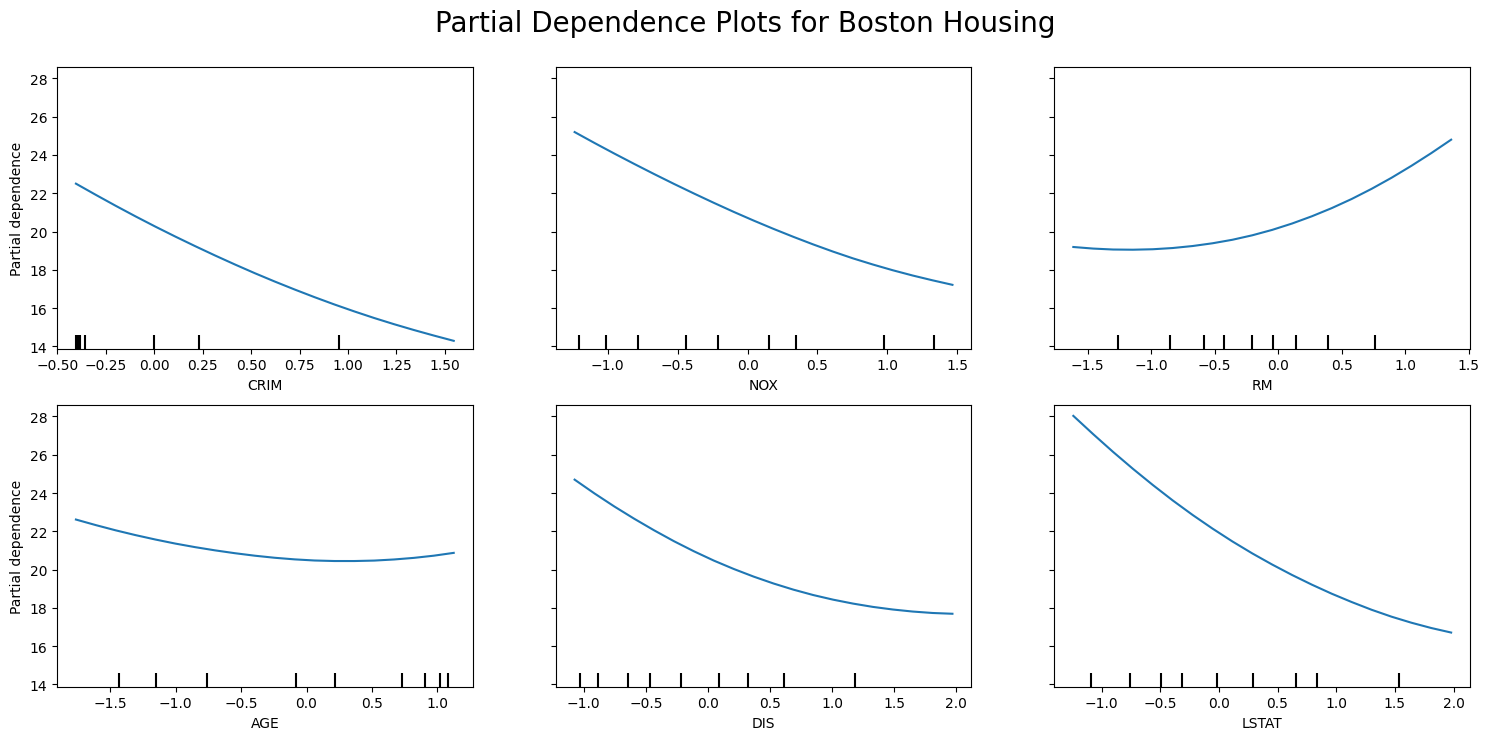

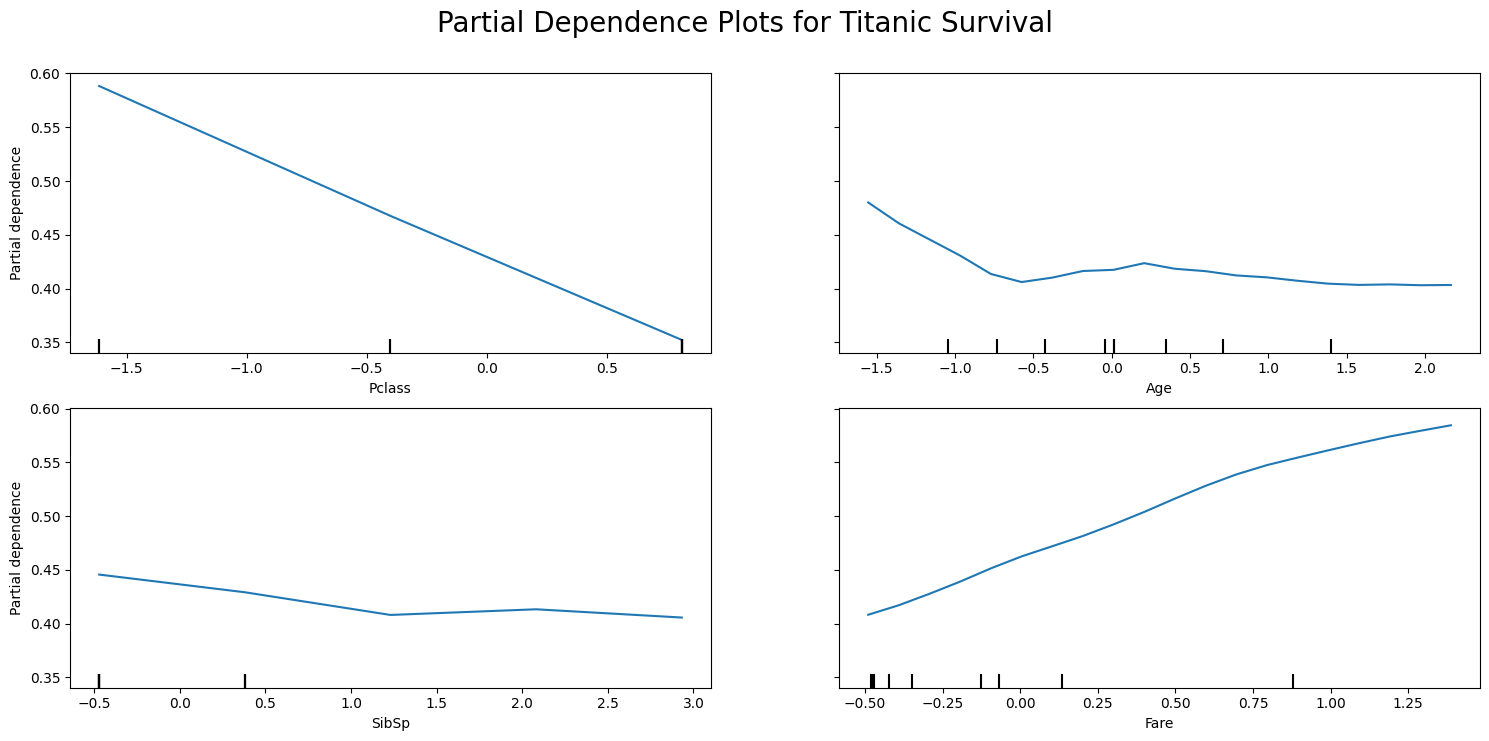

In [38]:
# PDP for Boston Housing
feature_names_boston = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

fig, ax = plt.subplots(figsize=(15, 8))  # Adjusted figure size for better spacing

PartialDependenceDisplay.from_estimator(
    mlp_regressor,
    X_test_boston_scaled,
    features=[0, 4, 5, 6, 7, 12],  # Indices for 'CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'LSTAT'
    feature_names=feature_names_boston,
    grid_resolution=20,
    n_cols=3,  # Plots in 2 rows of 3 columns for better alignment
    ax=ax
)

plt.suptitle('Partial Dependence Plots for Boston Housing', fontsize=20, y=0.95)  # Main title with adjusted y-position
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ensures no overlap
plt.show()


print("\n")


# PDP for Titanic
feature_names_titanic = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']

fig, ax = plt.subplots(figsize=(15, 8))  # Adjusted figure size

PartialDependenceDisplay.from_estimator(
    mlp_classifier,
    X_test_titanic_scaled,
    features=[0, 1, 2, 4],  # Indices for 'Pclass', 'Age', 'SibSp', 'Fare'
    feature_names=feature_names_titanic,
    grid_resolution=20,
    n_cols=2,  # Plots in 2 rows of 2 columns
    ax=ax
)

plt.suptitle('Partial Dependence Plots for Titanic Survival', fontsize=20, y=0.95)  # Adjusted y-position
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ensures no overlap
plt.show()

### Interpretation of 1a

----- <> -----